### Relevante pakker

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df_start = pd.read_csv("../resources/lego.population.csv", sep =",", encoding ="latin1")
df_start

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df_start[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Unique_Pieces', 'Minifigures']]

# fjerner observasjoner med manglende datapunkter
#df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)


#egen rens
df2['Gender'] = np.nan


boy_names = []

with open("../resources/boy_names.txt") as file:
  for index, line in enumerate(file):
    if index < 6:
      continue
    name = line.strip().lower()

    boy_names.append(name)

girl_names = []

with open("../resources/girl_names.txt") as file:
  for index, line in enumerate(file):
    if index < 6:
      continue
    name = line.strip().lower()

    girl_names.append(name)


def inGirlList(set_name):
  for girl in girl_names:
    if str(set_name).find(girl) != -1:
      return 1
  return np.NAN

def inBoyList(set_name):
  for boy in boy_names:
    if str(set_name).find(boy) != -1:
      return 2
  return np.NAN

# Apply the functions to create the 'Gender' column
df2['Gender'] = df2['Set_Name'].apply(lambda x: inGirlList(x) if inGirlList(x) == 1 else inBoyList(x))

themes = dict()


for line in open("../resources/theme_gender.txt"):
  if line.startswith("*") or line.isspace():
    continue
  else:
    words = line.strip().split("=")
    themes[words[0].lower().replace(" ", "")] = words[1].replace(" ", "")

print(themes.keys())


for index, lego_set in df_start.iterrows():
  set_theme = str(lego_set["Theme"]).lower().replace(" ", "")
  if set_theme in themes.keys():
    newValue = int((themes[set_theme]))

    if str(set_theme).__eq__("HarryPotter".lower()):
      print("harry")

    if newValue == 0:
      df2['Gender'][index] = 0
    elif newValue == 1:
      df2['Gender'][index] = 2
    elif newValue == 2:
      df2['Gender'][index] = 1


df2 = df2.dropna()
df2['Gender'] = df2['Gender'].astype(str)


#579

df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_6832\1667755471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Theme'] = df2['Theme'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6832\1667755471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6832\1667755471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

dict_keys(['batman', 'dc', 'marvel', 'ninjago', 'speedchampions', 'spider-man', 'technic', 'minecraft', 'overwatch', 'starwars', 'hiddenside', 'monkiekid', 'disney', 'dots', 'friends', 'legofrozen2', 'powerpuffgirls', 'unikitty!', 'trollsworldtour', 'legoart', 'architecture', 'brickheadz', 'city', 'classic', 'creator3-in-1', 'creatorexpert', 'duplo', 'juniors', 'legosupermario', 'minifigures', 'minions', 'xtra', 'ideas', 'thelegomovie2', 'harrypotter', 'jurassicworld', 'legobricksketches', 'legoeducation', 'poweredup', 'strangerthings'])


,Set_Name,Theme,Pieces,Price,Pages,Unique_Pieces,Minifigures,Gender
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,52.0,1.0,1.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,41.0,1.0,1.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,48.0,2.0,1.0
19,Police Patrol Car,City,92.0,9.99,36.0,52.0,1.0,0.0
20,Prince Puppycorn Trike,Unikitty,101.0,9.99,56.0,65.0,3.0,1.0
...,...,...,...,...,...,...,...,...
1170,Disney Train and Station,Powered UP,2925.0,329.99,397.0,509.0,5.0,0.0
1172,Tree House,Ideas,3036.0,199.99,428.0,482.0,4.0,0.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,692.0,13.0,1.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,525.0,6.0,1.0


### Mer eller mindre relevante kodesnutter

In [4]:
print(df2.mean(numeric_only = True))

Pieces           414.753285
Price             45.979781
Pages            104.235036
Unique_Pieces    146.795620
Minifigures        3.252555
dtype: float64


In [5]:
print(df2['Theme'].value_counts())

Theme
Friends              94
City                 94
Star Wars            71
NINJAGO              60
Marvel               47
Disney               31
nan                  28
THE LEGO MOVIE 2     24
DUPLO                24
Creator 3-in-1       21
Harry Potter         20
Hidden Side          19
Minecraft            17
Speed Champions      17
Jurassic World       16
Batman               15
Juniors              12
Creator Expert       10
Monkie Kid            9
Ideas                 8
DC                    8
Trolls World Tour     8
LEGO Frozen 2         7
Unikitty              6
Classic               4
Overwatch             4
Minifigures           3
Spider-Man            2
Powerpuff Girls       2
Minions               2
Stranger Things       1
Powered UP            1
Name: count, dtype: int64


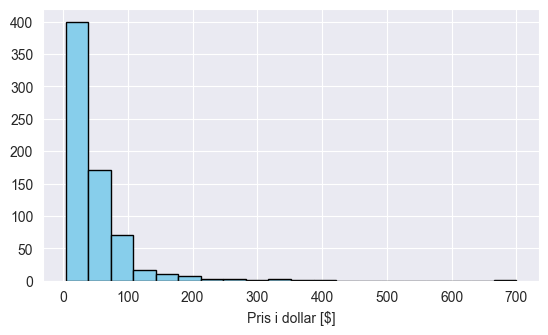

In [6]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

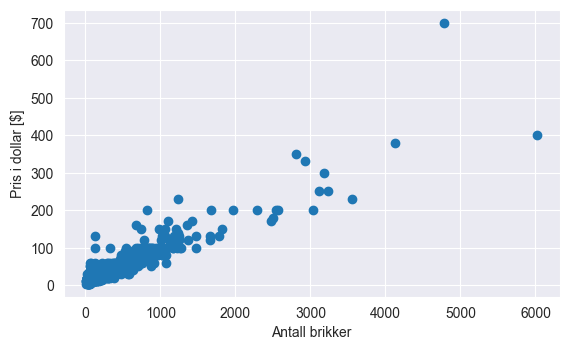

In [7]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [8]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name         Imperial Star Destroyer
Theme                          Star Wars
Pieces                            4784.0
Price                             699.99
Pages                              444.0
Unique_Pieces                      445.0
Minifigures                          2.0
Gender                               1.0
Name: 825, dtype: object


In [9]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name         Hogwarts Castle
Theme               Harry Potter
Pieces                    6020.0
Price                     399.99
Pages                      636.0
Unique_Pieces              624.0
Minifigures                 28.0
Gender                       2.0
Name: 821, dtype: object


In [10]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Minifigures        12.99
Unikitty           18.99
Powerpuff Girls    24.99
Name: Price, dtype: float64

In [11]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Powered UP         2925.0
Stranger Things    2287.0
Creator Expert     2073.5
Name: Pieces, dtype: float64

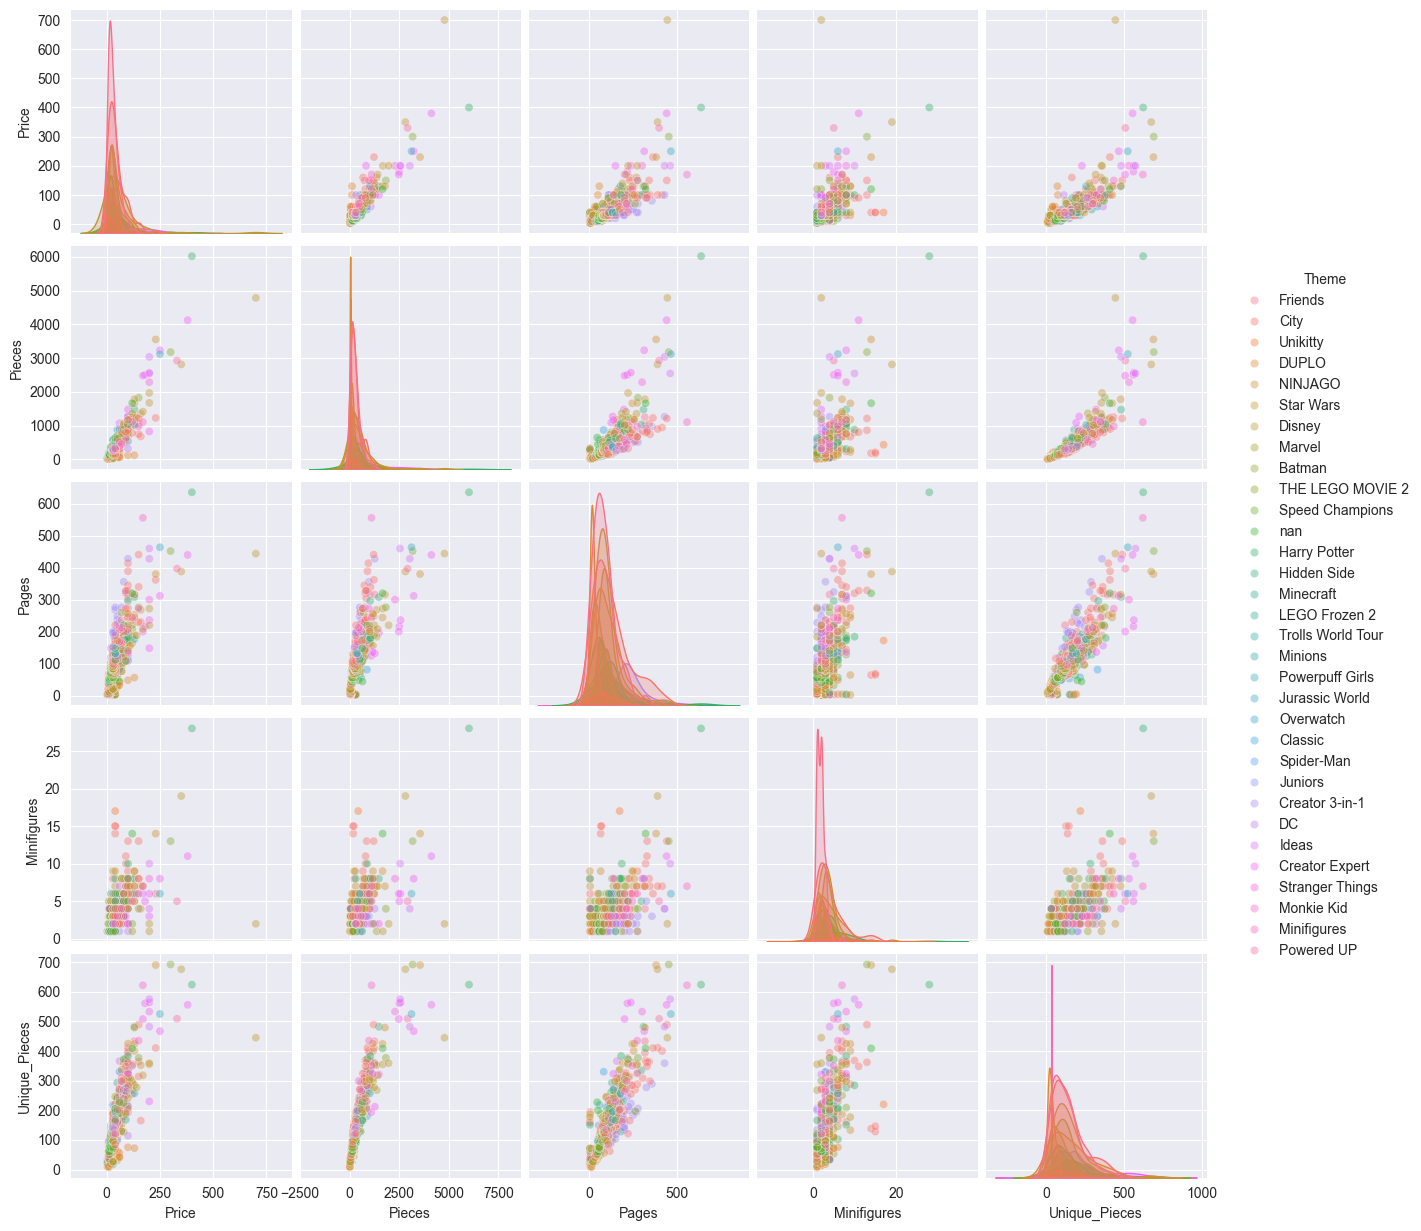

In [12]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [13]:
# enkel lineær regresjon
formel = 'Gender ~ Price'


modell = smf.ols(formel, data = df2)
resultat = modell.fit()

print(resultat.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (685, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [ ]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

In [ ]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [ ]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces +  Minifigures + Gender + Theme' , data = df2)
print(modell3_mlr.fit().summary())

In [ ]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
print(modell3_mlr_alt.fit().summary())

In [ ]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

In [ ]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

In [ ]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')